In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression
sns.set()

In [2]:
df = pd.read_csv('flight_data_labeled.csv')
df.head()

,Unnamed: 0,Price,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,Dept_flights_time,optimal_time,Dep_hour,Dep_min,Arrival_hour,Arrival_min,optimal_hours
0,0,3112,6,0,19,1,17,1,350,5,1,11,14,30,20,20,3
1,1,3113,12,0,19,1,17,1,255,5,2,13,16,55,21,10,3
2,2,3113,12,0,19,1,17,1,260,5,2,13,16,45,21,5,3
3,3,3113,12,0,19,1,17,1,305,5,0,4,7,55,13,0,3
4,4,3113,12,0,19,1,17,1,320,5,0,6,9,0,14,20,3


In [3]:
df = df.iloc[: , 1:]
df.head()

,Price,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,Dept_flights_time,optimal_time,Dep_hour,Dep_min,Arrival_hour,Arrival_min,optimal_hours
0,3112,6,0,19,1,17,1,350,5,1,11,14,30,20,20,3
1,3113,12,0,19,1,17,1,255,5,2,13,16,55,21,10,3
2,3113,12,0,19,1,17,1,260,5,2,13,16,45,21,5,3
3,3113,12,0,19,1,17,1,305,5,0,4,7,55,13,0,3
4,3113,12,0,19,1,17,1,320,5,0,6,9,0,14,20,3


## Feature engineering using PCA


In [4]:
features = ['Price', 'Airline', 'Cabin', 'Dept_city', 'Dept_date', 'arrival_city', 'stops', 
           'duration', 'weekday', 'Dept_flights_time','Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min','optimal_time']

In [5]:
print("Correlation with optimal hours:\n")
print(df[features].corrwith(df.optimal_time))

Correlation with optimal hours:

Price                0.004834
Airline              0.021344
Cabin                0.005300
Dept_city            0.009938
Dept_date            0.018700
arrival_city        -0.001780
stops                0.004974
duration            -0.030012
weekday             -0.061869
Dept_flights_time   -0.167815
Dep_hour            -0.134378
Dep_min              0.020950
Arrival_hour         0.049672
Arrival_min          0.006868
optimal_time         1.000000
dtype: float64


### Let's check feature importance with Random forest regreeesor

In [9]:
#cols = ['Price', 'Cabin', 'duration', 'Dept_flights_time', 'Dep_hour','optimal_hours','weekday']
X = df[features].copy()
y= X.pop('optimal_time')

In [10]:
#scaling the data 
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [11]:
X_scaled

,Price,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,Dept_flights_time,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,-0.686548,-0.575255,-0.531010,0.643672,-1.924148,0.394503,-0.347461,-0.658926,1.004477,0.005258,0.288197,0.195981,1.032923,-0.45457
1,-0.686486,-0.022868,-0.531010,0.643672,-1.924148,0.394503,-0.347461,-0.919548,1.004477,1.041693,0.700655,1.613381,1.222420,-1.05215
2,-0.686486,-0.022868,-0.531010,0.643672,-1.924148,0.394503,-0.347461,-0.905831,1.004477,1.041693,0.700655,1.046421,1.222420,-1.35094
3,-0.686486,-0.022868,-0.531010,0.643672,-1.924148,0.394503,-0.347461,-0.782379,1.004477,-1.031176,-1.155406,1.613381,-0.293563,-1.64973
4,-0.686486,-0.022868,-0.531010,0.643672,-1.924148,0.394503,-0.347461,-0.741228,1.004477,-1.031176,-0.742948,-1.504900,-0.104065,-0.45457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330933,-0.296647,1.173972,0.736117,0.883232,1.627056,0.394503,-0.347461,0.685336,1.483276,-1.031176,-0.742948,1.329901,1.601416,1.33817
330934,-0.296647,1.173972,0.736117,0.883232,1.627056,0.394503,-0.347461,2.084466,1.483276,-1.031176,-0.742948,1.329901,-1.241052,-0.45457
330935,-0.186803,1.173972,0.736117,0.883232,1.627056,-1.392009,-0.347461,2.207918,1.483276,-1.031176,-0.742948,1.329901,-1.051554,-1.35094
330936,-0.531489,1.173972,0.736117,0.883232,1.627056,-1.034707,-1.592960,-1.248755,1.483276,-1.031176,-0.742948,1.329901,-0.483060,-1.35094


### PCA

In [12]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA() #n_components=12 by default or can give percentage e.g. 0.95
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-0.813151,-0.351525,-0.868053,-0.280866,0.800462,0.833951,-0.041845,-1.773013,0.165599,-1.285021,-0.677899,-0.078695,-0.223026,-0.150218
1,-0.834035,-1.148459,-1.145867,-0.309933,1.551038,1.866112,0.707347,-1.045644,-0.168104,-1.551061,-0.507231,0.330849,0.232783,-0.145848
2,-0.797551,-1.219504,-1.184269,-0.607054,1.407290,1.720682,0.324425,-1.291070,-0.329973,-1.361025,-0.448126,0.346822,0.231775,-0.151566
3,-1.482957,1.021884,0.171059,-0.725949,1.686242,1.704612,0.959117,-1.438279,-0.489226,-0.066626,-1.328425,0.039883,0.011940,-0.171412
4,-1.236464,0.496222,-0.272061,-0.737317,0.189014,-0.221543,-0.465711,-2.714880,0.266220,0.324703,-0.684375,0.047859,-0.262576,-0.147460


In [13]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Price,0.485837,0.296305,-0.285558,-0.050822,-0.044682,0.072743,0.070500,0.063307,0.036216,0.136765,0.101926,0.123061,0.005743,0.728143
Airline,-0.321788,-0.143357,-0.009506,-0.023009,0.111388,0.003787,0.344532,-0.048909,-0.026347,0.426759,0.716417,0.209111,0.032365,0.030333
Cabin,0.408311,0.272786,-0.446796,-0.064159,-0.098675,0.091600,0.113493,0.130408,0.074676,0.242839,0.106604,-0.076101,0.010773,-0.652146
Dept_city,0.010815,-0.005904,-0.044913,0.442904,0.434782,0.371211,-0.495969,-0.214695,0.319309,0.282488,0.021647,-0.022513,0.003109,-0.003422
Dept_date,-0.052395,-0.011246,0.284572,0.121871,-0.491761,0.227173,-0.345710,0.657092,0.019699,0.174606,0.156398,0.024586,0.009623,0.023216
arrival_city,0.001029,0.010571,0.193788,-0.622497,0.080608,0.164990,-0.006105,0.026075,0.713026,-0.141874,0.099906,-0.043323,-0.000241,-0.001128
stops,0.381656,0.176808,0.437895,0.089534,0.085254,-0.042960,-0.078874,-0.128442,-0.081715,-0.266167,0.203959,0.655669,0.012029,-0.205693
duration,0.405166,-0.041939,0.422585,0.062195,0.092665,-0.047315,0.040302,-0.101135,-0.155789,-0.039634,0.357584,-0.688507,0.032103,0.013347
weekday,-0.011014,-0.046524,0.059495,0.086234,-0.557393,0.589325,0.223865,-0.523982,0.003280,-0.048916,-0.040522,-0.003556,0.003668,0.001704
Dept_flights_time,0.256325,-0.616397,-0.158174,0.006308,0.014262,0.047968,0.009429,0.089558,0.031606,-0.092327,-0.016156,0.100616,0.706237,0.001053


In [14]:
#making function for plotting variance and mi scores so we can use code repetetively

def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

array([0.19183953, 0.13133557, 0.09251567, 0.07915486, 0.07350954,
       0.07221629, 0.07032283, 0.06748905, 0.06488745, 0.0598583 ,
       0.05308782, 0.02702696, 0.01005439, 0.00670171])

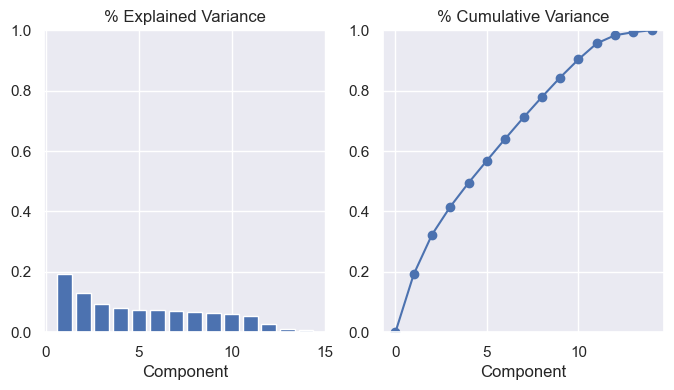

In [15]:
plot_variance(pca)
pca.explained_variance_ratio_

In [16]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC2     0.104416
PC1     0.023203
PC8     0.022297
PC13    0.020100
PC3     0.019261
PC5     0.009477
PC12    0.004649
PC7     0.004289
PC10    0.003751
PC6     0.002398
PC14    0.000710
PC4     0.000000
PC9     0.000000
PC11    0.000000
Name: MI Scores, dtype: float64

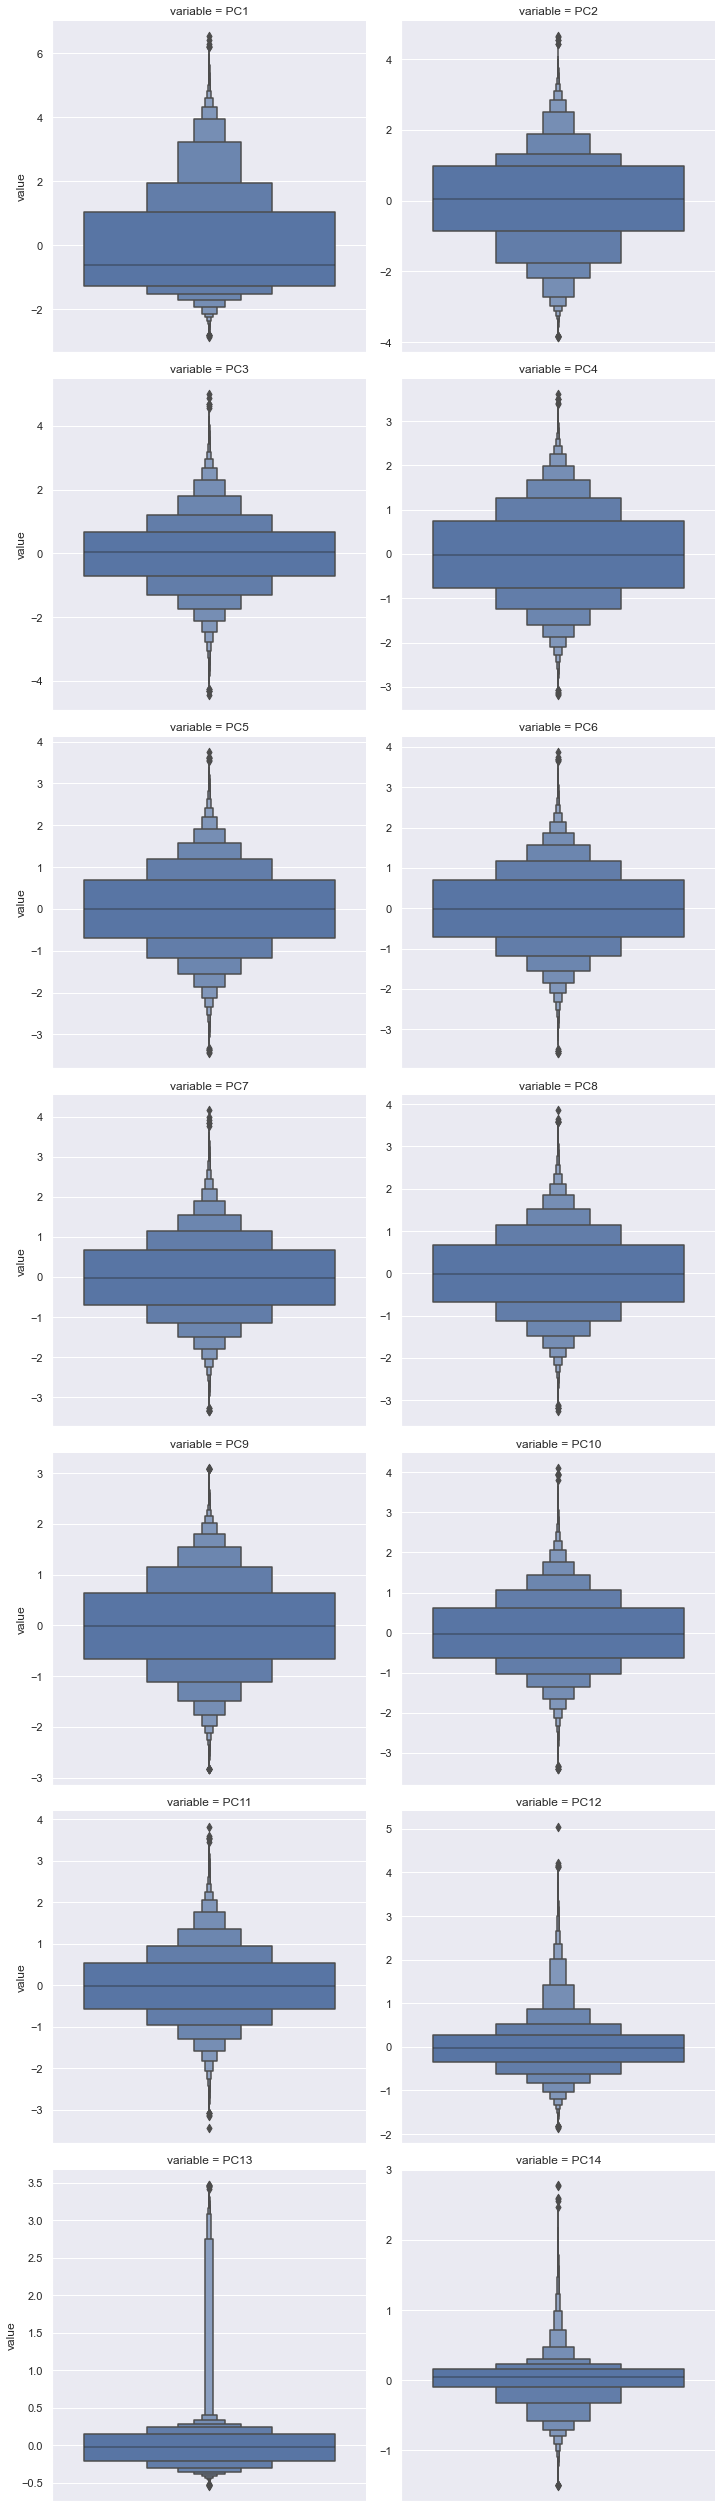

In [17]:
sns.catplot(
    y="value",
    col="variable",
    data=X_pca.melt(),
    kind='boxen',
    sharey=False,
    col_wrap=2,
)

In [18]:
idx = X_pca["PC2"].sort_values(ascending=False).index
df.loc[idx, features]

,Price,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,Dept_flights_time,Dep_hour,Dep_min,Arrival_hour,Arrival_min,optimal_time
272552,112072,0,2,5,9,0,5,285,6,0,5,5,9,50,15
259962,115432,0,2,5,4,0,4,285,1,0,5,5,9,50,12
277297,112072,0,2,5,11,0,4,285,1,0,5,5,9,50,8
293566,112072,0,2,5,18,0,4,285,1,0,5,5,9,50,17
288541,112072,0,2,5,16,0,4,285,6,0,5,5,9,50,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51758,5229,18,0,13,9,9,0,125,6,3,23,0,1,5,13
232966,5229,18,0,13,29,9,0,125,5,3,23,0,1,5,8
116675,5229,18,0,13,16,9,0,125,6,3,23,0,1,5,6
179090,5229,18,0,13,23,9,0,125,6,3,23,0,1,5,15


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [21]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test= scaler.transform(X_test)

In [22]:
col = ['Price', 'Airline', 'Cabin', 'Dept_city', 'Dept_date', 'arrival_city', 'stops', 
           'duration', 'weekday', 'Dept_flights_time','Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min']
X_train = pd.DataFrame(X_train, columns=[col])
X_test = pd.DataFrame(X_test, columns=[col])

In [23]:
y_test

81636     18
15380      1
283624    12
273821    17
59470     20
          ..
92844     22
262857    16
321091    21
75512      4
130365    10
Name: optimal_time, Length: 99282, dtype: int64

### Random Forest Classifier model with default parameters

In [32]:
from sklearn.ensemble import RandomForestRegressor
import joblib
# Performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

perf_df = pd.DataFrame(columns=["Regressors", "MSE", "RMSE", "MAE", "R2"])
def print_metrics(y_test, model_pred, regressor_name, perf_df):
    
    mse = mean_squared_error(y_test, model_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, model_pred)
    r2 = r2_score(y_test, model_pred)
    
    print(f"MSE      : {mse}", end="\n\n")
    print(f"RMSE     : {rmse}", end="\n\n")
    print(f"MAE      : {mae}", end="\n\n")
    print(f"R2 Score : {r2}", end="\n\n")
    
    perf_df = perf_df.append({"Regressors": regressor_name,
                                        "MSE": mse, 
                                        "RMSE": rmse,
                                        "MAE": mae,
                                        "R2": r2}, ignore_index=True)
    return perf_df

### Random Forest Classifier model with 100 Decision Trees

In [35]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
perf_df = print_metrics(y_test, model_pred, "RandomForestRegressor", perf_df)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


MSE      : 4.1812159960394375

RMSE     : 2.0448021899536974

MAE      : 0.6641953758105855

R2 Score : 0.9118904233317235



### Find important features with Random Forest model

In [39]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

<IPython.core.display.Javascript object>

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier(random_state=0)

In [40]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Dept_date            0.248967
Dept_city            0.110637
weekday              0.105546
Price                0.094837
Dep_hour             0.083962
Dep_min              0.072983
duration             0.063527
arrival_city         0.051444
Arrival_min          0.043841
Airline              0.041911
Arrival_hour         0.038478
stops                0.017064
Cabin                0.015500
Dept_flights_time    0.011303
dtype: float64